<a href="https://colab.research.google.com/github/aparna2071/GAN-code/blob/main/GAN_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

Load and prepare data

In [2]:
# Load the dataset
(X_train, _), (_, _) = mnist.load_data()
X_train = X_train / 255.0  # Normalize to [0, 1] range
X_train = np.expand_dims(X_train, axis=-1)  # Add channel dimension

# Set dimensions
img_shape = (28, 28, 1)
latent_dim = 100  # Dimension of the latent space (input to Generator)

11490434/11490434 [==============================] - 0s 0us/step


Build generator

In [3]:
def build_generator(latent_dim):
    model = tf.keras.Sequential()

    model.add(layers.Dense(256, activation='relu', input_dim=latent_dim))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(np.prod(img_shape), activation='tanh'))
    model.add(layers.Reshape(img_shape))

    return model

generator = build_generator(latent_dim)
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               25856     
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 batch_normalization_2 (Bat  (None, 1024)              4

Build discriminator

In [4]:
def build_discriminator(img_shape):
    model = tf.keras.Sequential()

    model.add(layers.Flatten(input_shape=img_shape))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

discriminator = build_discriminator(img_shape)
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 1)                 257       
                                                                 
Total params: 533505 (2.04 MB)
Trainable params: 533505 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile models

In [5]:
# Compile the Discriminator
discriminator.compile(loss='binary_crossentropy',
                      optimizer=tf.keras.optimizers.Adam(0.0002, 0.5),
                      metrics=['accuracy'])

# Compile the combined model (Generator -> Discriminator)
discriminator.trainable = False

z = layers.Input(shape=(latent_dim,))
img = generator(z)
validity = discriminator(img)

combined = tf.keras.Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0002, 0.5))

Train GAN

2/2 [==============================] - 0s 10ms/step
0 [D loss: 0.7452778220176697 | D accuracy: 47.65625] [G loss: 0.7949252128601074]
1/1 [==============================] - 0s 264ms/step


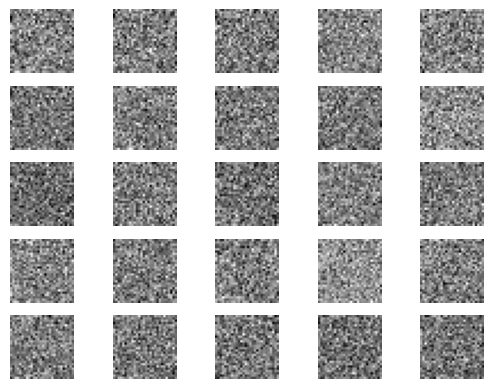

2/2 [==============================] - 0s 11ms/step
100 [D loss: 0.44009582698345184 | D accuracy: 78.125] [G loss: 5.872129440307617]
2/2 [==============================] - 0s 14ms/step
200 [D loss: 0.38415512442588806 | D accuracy: 85.9375] [G loss: 3.7666077613830566]
2/2 [==============================] - 0s 13ms/step
300 [D loss: 0.25258517265319824 | D accuracy: 92.1875] [G loss: 5.469422340393066]
2/2 [==============================] - 0s 20ms/step
400 [D loss: 0.1827327087521553 | D accuracy: 97.65625] [G loss: 5.207455635070801]
2/2 [==============================] - 0s 11ms/step
500 [D loss: 0.3841927647590637 | D accuracy: 80.46875] [G loss: 7.869043350219727]
2/2 [==============================] - 0s 10ms/step
600 [D loss: 0.3032342791557312 | D accuracy: 92.1875] [G loss: 6.605586528778076]
2/2 [==============================] - 0s 21ms/step
700 [D loss: 0.3856656700372696 | D accuracy: 87.5] [G loss: 3.1550674438476562]
2/2 [==============================] - 0s 12ms/step


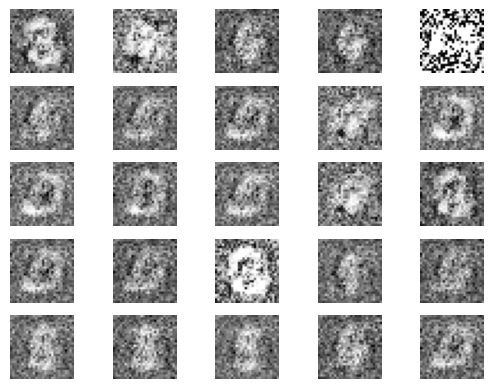

2/2 [==============================] - 0s 11ms/step
1100 [D loss: 0.5665867924690247 | D accuracy: 71.09375] [G loss: 1.6342790126800537]
2/2 [==============================] - 0s 13ms/step
1200 [D loss: 0.6276213824748993 | D accuracy: 62.5] [G loss: 1.2932227849960327]
2/2 [==============================] - 0s 10ms/step
1300 [D loss: 0.6734949946403503 | D accuracy: 50.0] [G loss: 0.870842695236206]
2/2 [==============================] - 0s 15ms/step
1400 [D loss: 0.7046912610530853 | D accuracy: 39.84375] [G loss: 0.7267718315124512]
2/2 [==============================] - 0s 15ms/step
1500 [D loss: 0.6919516623020172 | D accuracy: 50.0] [G loss: 0.7221582531929016]
2/2 [==============================] - 0s 13ms/step
1600 [D loss: 0.6623340845108032 | D accuracy: 51.5625] [G loss: 0.7618903517723083]
2/2 [==============================] - 0s 14ms/step
1700 [D loss: 0.6986824572086334 | D accuracy: 50.78125] [G loss: 0.6964142918586731]
2/2 [==============================] - 0s 13ms/s

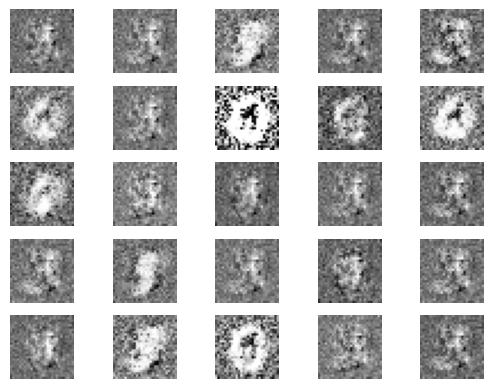

2/2 [==============================] - 0s 10ms/step
2100 [D loss: 0.6441239416599274 | D accuracy: 47.65625] [G loss: 0.7430111169815063]
2/2 [==============================] - 0s 12ms/step
2200 [D loss: 0.6269883513450623 | D accuracy: 67.1875] [G loss: 0.8169513940811157]
2/2 [==============================] - 0s 13ms/step
2300 [D loss: 0.5520130097866058 | D accuracy: 78.90625] [G loss: 1.0426218509674072]
2/2 [==============================] - 0s 12ms/step
2400 [D loss: 0.6285682916641235 | D accuracy: 60.15625] [G loss: 0.9193737506866455]
2/2 [==============================] - 0s 13ms/step
2500 [D loss: 0.5575336068868637 | D accuracy: 74.21875] [G loss: 1.093447208404541]
2/2 [==============================] - 0s 15ms/step
2600 [D loss: 0.5829575657844543 | D accuracy: 75.0] [G loss: 1.046095848083496]
2/2 [==============================] - 0s 27ms/step
2700 [D loss: 0.6213852763175964 | D accuracy: 60.15625] [G loss: 1.0690014362335205]
2/2 [==============================] - 0s

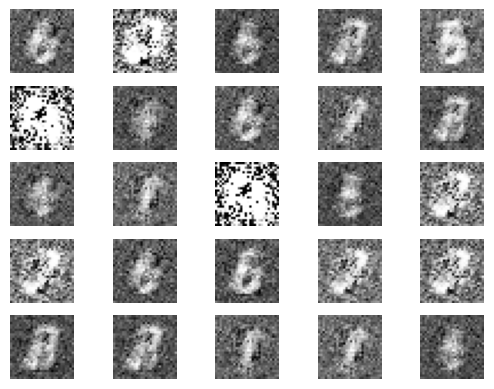

2/2 [==============================] - 0s 10ms/step
3100 [D loss: 0.5381864458322525 | D accuracy: 69.53125] [G loss: 1.3003671169281006]
2/2 [==============================] - 0s 10ms/step
3200 [D loss: 0.4945497512817383 | D accuracy: 78.90625] [G loss: 1.3321130275726318]
2/2 [==============================] - 0s 12ms/step
3300 [D loss: 0.5218747109174728 | D accuracy: 70.3125] [G loss: 1.5168925523757935]
2/2 [==============================] - 0s 15ms/step
3400 [D loss: 0.4761238843202591 | D accuracy: 82.03125] [G loss: 1.741370439529419]
2/2 [==============================] - 0s 11ms/step
3500 [D loss: 0.4823770374059677 | D accuracy: 86.71875] [G loss: 1.4035720825195312]
2/2 [==============================] - 0s 12ms/step
3600 [D loss: 0.5901380479335785 | D accuracy: 67.1875] [G loss: 1.2673988342285156]
2/2 [==============================] - 0s 14ms/step
3700 [D loss: 0.4721682220697403 | D accuracy: 75.78125] [G loss: 1.9748973846435547]
2/2 [==============================] 

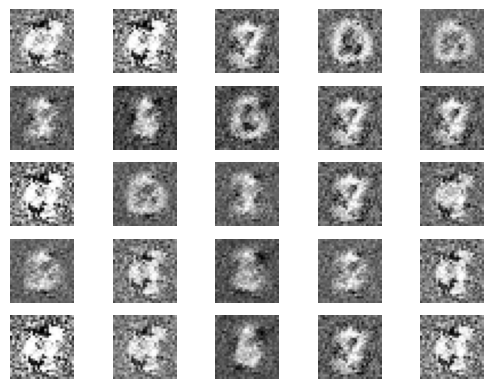

2/2 [==============================] - 0s 13ms/step
4100 [D loss: 0.44710877537727356 | D accuracy: 85.15625] [G loss: 1.5589789152145386]
2/2 [==============================] - 0s 12ms/step
4200 [D loss: 0.4697563052177429 | D accuracy: 78.90625] [G loss: 1.9560586214065552]
2/2 [==============================] - 0s 9ms/step
4300 [D loss: 0.4208746403455734 | D accuracy: 83.59375] [G loss: 2.2130792140960693]
2/2 [==============================] - 0s 14ms/step
4400 [D loss: 0.4483720660209656 | D accuracy: 82.8125] [G loss: 1.8975982666015625]
2/2 [==============================] - 0s 9ms/step
4500 [D loss: 0.36352962255477905 | D accuracy: 89.0625] [G loss: 2.1037373542785645]
2/2 [==============================] - 0s 10ms/step
4600 [D loss: 0.3929915726184845 | D accuracy: 82.03125] [G loss: 2.234928607940674]
2/2 [==============================] - 0s 10ms/step
4700 [D loss: 0.4471253454685211 | D accuracy: 82.8125] [G loss: 1.9190044403076172]
2/2 [==============================] -

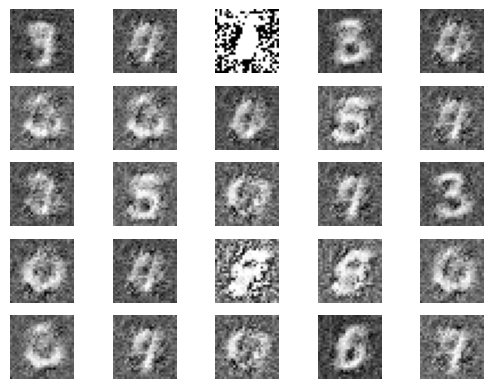

2/2 [==============================] - 0s 11ms/step
5100 [D loss: 0.30301523208618164 | D accuracy: 91.40625] [G loss: 2.625667095184326]
2/2 [==============================] - 0s 14ms/step
5200 [D loss: 0.39977599680423737 | D accuracy: 84.375] [G loss: 2.154541015625]
2/2 [==============================] - 0s 12ms/step
5300 [D loss: 0.4483998864889145 | D accuracy: 78.90625] [G loss: 2.1485061645507812]
2/2 [==============================] - 0s 13ms/step
5400 [D loss: 0.43988198041915894 | D accuracy: 84.375] [G loss: 2.6132051944732666]
2/2 [==============================] - 0s 10ms/step
5500 [D loss: 0.29277223348617554 | D accuracy: 91.40625] [G loss: 2.434880495071411]
2/2 [==============================] - 0s 13ms/step
5600 [D loss: 0.4552704691886902 | D accuracy: 80.46875] [G loss: 2.5439627170562744]
2/2 [==============================] - 0s 10ms/step
5700 [D loss: 0.34134507179260254 | D accuracy: 87.5] [G loss: 2.2487242221832275]
2/2 [==============================] - 0s 1

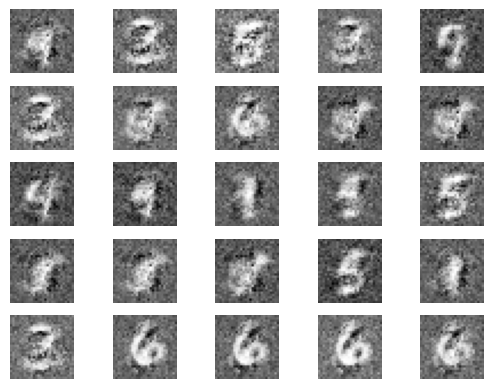

2/2 [==============================] - 0s 10ms/step
6100 [D loss: 0.41118529438972473 | D accuracy: 86.71875] [G loss: 3.6019768714904785]
2/2 [==============================] - 0s 12ms/step
6200 [D loss: 0.4434468746185303 | D accuracy: 78.90625] [G loss: 2.8937597274780273]
2/2 [==============================] - 0s 18ms/step
6300 [D loss: 0.4106205403804779 | D accuracy: 84.375] [G loss: 2.713512420654297]
2/2 [==============================] - 0s 11ms/step
6400 [D loss: 0.2859735041856766 | D accuracy: 94.53125] [G loss: 2.4482789039611816]
2/2 [==============================] - 0s 13ms/step
6500 [D loss: 0.41393759846687317 | D accuracy: 82.03125] [G loss: 3.027385711669922]
2/2 [==============================] - 0s 11ms/step
6600 [D loss: 0.25089994072914124 | D accuracy: 95.3125] [G loss: 2.0878617763519287]
2/2 [==============================] - 0s 14ms/step
6700 [D loss: 0.3592117726802826 | D accuracy: 87.5] [G loss: 2.3905322551727295]
2/2 [==============================] - 0

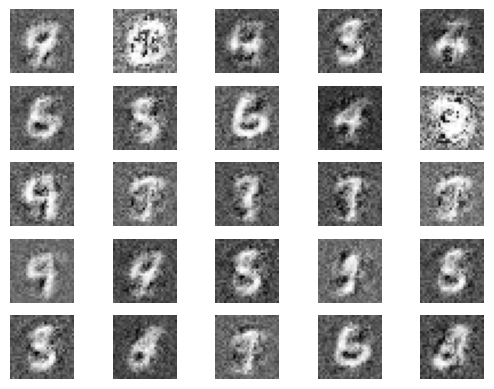

2/2 [==============================] - 0s 11ms/step
7100 [D loss: 0.26152588427066803 | D accuracy: 93.75] [G loss: 2.9699110984802246]
2/2 [==============================] - 0s 10ms/step
7200 [D loss: 0.3513358384370804 | D accuracy: 89.0625] [G loss: 4.892536163330078]
2/2 [==============================] - 0s 18ms/step
7300 [D loss: 0.30112817883491516 | D accuracy: 89.0625] [G loss: 3.3331613540649414]
2/2 [==============================] - 0s 17ms/step
7400 [D loss: 0.3232627809047699 | D accuracy: 89.84375] [G loss: 3.4838733673095703]
2/2 [==============================] - 0s 12ms/step
7500 [D loss: 0.24606658518314362 | D accuracy: 92.96875] [G loss: 3.2692437171936035]
2/2 [==============================] - 0s 14ms/step
7600 [D loss: 0.300836481153965 | D accuracy: 87.5] [G loss: 2.730772018432617]
2/2 [==============================] - 0s 10ms/step
7700 [D loss: 0.2129184976220131 | D accuracy: 93.75] [G loss: 1.3614931106567383]
2/2 [==============================] - 0s 13ms

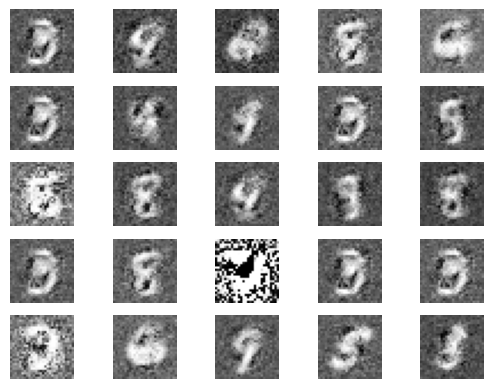

2/2 [==============================] - 0s 10ms/step
8100 [D loss: 0.30294598639011383 | D accuracy: 89.84375] [G loss: 5.717924118041992]
2/2 [==============================] - 0s 12ms/step
8200 [D loss: 0.3819263130426407 | D accuracy: 84.375] [G loss: 4.100821495056152]
2/2 [==============================] - 0s 14ms/step
8300 [D loss: 0.16634802147746086 | D accuracy: 96.09375] [G loss: 3.078672409057617]
2/2 [==============================] - 0s 11ms/step
8400 [D loss: 0.34389300644397736 | D accuracy: 85.9375] [G loss: 4.4847259521484375]
2/2 [==============================] - 0s 12ms/step
8500 [D loss: 0.27192801237106323 | D accuracy: 90.625] [G loss: 3.14369535446167]
2/2 [==============================] - 0s 13ms/step
8600 [D loss: 0.24802827090024948 | D accuracy: 86.71875] [G loss: 2.8870689868927]
2/2 [==============================] - 0s 12ms/step
8700 [D loss: 0.2974134534597397 | D accuracy: 89.0625] [G loss: 3.4046759605407715]
2/2 [==============================] - 0s 1

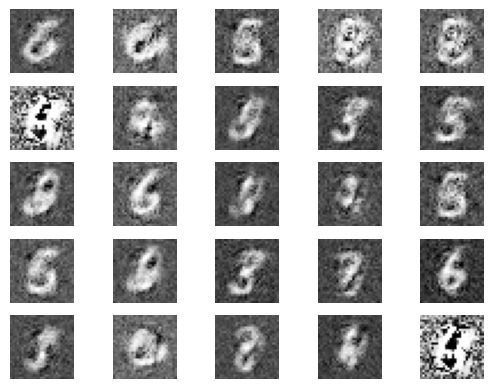

2/2 [==============================] - 0s 12ms/step
9100 [D loss: 0.12915463000535965 | D accuracy: 96.09375] [G loss: 3.0676519870758057]
2/2 [==============================] - 0s 20ms/step
9200 [D loss: 0.15036603063344955 | D accuracy: 94.53125] [G loss: 4.5776543617248535]
2/2 [==============================] - 0s 18ms/step
9300 [D loss: 0.19612102955579758 | D accuracy: 94.53125] [G loss: 2.969691753387451]
2/2 [==============================] - 0s 12ms/step
9400 [D loss: 0.1331620141863823 | D accuracy: 97.65625] [G loss: 2.949950695037842]
2/2 [==============================] - 0s 16ms/step
9500 [D loss: 0.18325480818748474 | D accuracy: 94.53125] [G loss: 3.1567869186401367]
2/2 [==============================] - 0s 12ms/step
9600 [D loss: 0.14478934928774834 | D accuracy: 95.3125] [G loss: 3.709221363067627]
2/2 [==============================] - 0s 9ms/step
9700 [D loss: 0.14191360026597977 | D accuracy: 95.3125] [G loss: 2.9042177200317383]
2/2 [=============================

In [6]:
# Training parameters
epochs = 10000
batch_size = 64
save_interval = 1000

# Labels for real and fake data
real = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

# Training loop
for epoch in range(epochs):

    # ---------------------
    #  Train Discriminator
    # ---------------------

    # Select a random half batch of real images
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    real_imgs = X_train[idx]

    # Generate a half batch of fake images
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    gen_imgs = generator.predict(noise)

    # Train the Discriminator
    d_loss_real = discriminator.train_on_batch(real_imgs, real)
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # ---------------------
    #  Train Generator
    # ---------------------

    noise = np.random.normal(0, 1, (batch_size, latent_dim))

    # The Generator wants the Discriminator to believe the fake images are real
    g_loss = combined.train_on_batch(noise, real)

    # Print progress
    if epoch % 100 == 0:
        print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100 * d_loss[1]}] [G loss: {g_loss}]")

    # If at save interval, save generated image samples
    if epoch % save_interval == 0:
        noise = np.random.normal(0, 1, (25, latent_dim))
        gen_imgs = generator.predict(noise)
        gen_imgs = 0.5 * gen_imgs + 0.5  # Rescale to [0, 1]

        fig, axs = plt.subplots(5, 5)
        cnt = 0
        for i in range(5):
            for j in range(5):
                axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
                axs[i, j].axis('off')
                cnt += 1
        plt.show()